# 가위바위보 분류기

In [137]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

2.2.0


## 1. 이미지 데이터 생성 및 변환

#### 이미지 크기 변경을 위한 PIL 라이브러리 설치 및 불러오기

In [138]:
!pip install pillow

from PIL import Image
import os, glob

print("PLI 라이브러리 import 완료!")

PLI 라이브러리 import 완료!


#### 훈련용 데이터 호출 및 이미지 크기 변경 (28X28)

In [139]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [140]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [141]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


#### 훈련용 데이터를 읽을 수 있는 load_data() 함수 생성

In [142]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3000    # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3    # 컬러 데이터(RGB)
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


#### 이미지 호출

라벨:  1


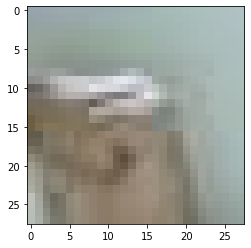

In [143]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1234])
print('라벨: ', y_train[1234])

- _1234번째 이미지를 호출했을 때, 바위와 비슷한 이미지가 호출 되었다._
- _0\~2999의 숫자를 바꿔가며 호출해 본 결과 0\~999는 가위, 1000\~1999는 바위, 2000\~2999는 보의 이미지가 나오는 것으로 예측된다._

## 2. 딥러닝 네트워크 설계

In [144]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_51 (Dense)             

- _훈련용 데이터 이미지는 컬러이므로 RGB로 들어가야 한다._
- _따라서 input_shape에 4번째(마지막) 인자는 3이다._

## 3. 딥러닝 학습

In [145]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - 0s 1ms/step - loss: 1.0516 - accuracy: 0.4303
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.8381 - accuracy: 0.6253
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.7490
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.8030
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8527
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8913
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.2522 - accuracy: 0.9160
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9407
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1549 - accuracy: 0.9567
Epoch 10/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9657


#### 훈련용 데이터만 학습했을 때의 인식률

In [146]:
train_loss, train_accuracy = model.evaluate(x_train_norm,y_train, verbose=2)
print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

94/94 - 0s - loss: 0.0961 - accuracy: 0.9843
train_loss: 0.0960707738995552 
train_accuracy: 0.984333336353302


## 4. 테스트

#### 시험용 데이터 호출 및 이미지 크기 변경 (28X28)

In [147]:
# 테스트용 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/test/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("테스트용 가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/test/scissor
테스트용 가위 이미지 resize 완료!


In [148]:
# 테스트용바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("테스트용 바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/test/rock
테스트용 바위 이미지 resize 완료!


In [149]:
# 테스트용 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/test/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("테스트용 보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/test/paper
테스트용 보 이미지 resize 완료!


#### 시험용 데이터를 읽을 수 있는 load_data() 함수 생성

In [150]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


#### 시험용 데이터에 대한 인식률 확인

In [151]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.2488 - accuracy: 0.8967
test_loss: 0.24881042540073395 
test_accuracy: 0.8966666460037231


- _훈련용 데이터(x_train)에 대한 인식률 : 0.984333336353302_
- _시험용 데이터(x_test)에 대한 인식률 : 0.8966666460037231_
- _시험용 데이터에 대한 인식률이 훈련용에 비해 낮은 수치를 기록_

## 5. 잘못 추론된 데이터 확인

#### model.predict() 사용해 model이 입력값을 보고 실제로 추론한 확률분포를 출력

In [152]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=167    #167번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.03455557 0.29599252 0.6694519 ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  1


- _실제 데이터는 바위(1)이지만 보(2)로 추론_

#### 직접 이미지 확인

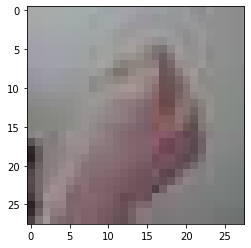

In [153]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

#### model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우 직접 확인

예측확률분포: [0.03455557 0.29599252 0.6694519 ]
라벨: 1, 예측결과: 2


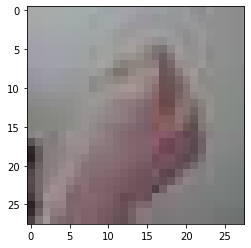

예측확률분포: [0.03686209 0.4175057  0.54563224]
라벨: 1, 예측결과: 2


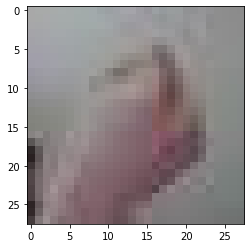

예측확률분포: [4.2966104e-01 6.9383626e-05 5.7026958e-01]
라벨: 0, 예측결과: 2


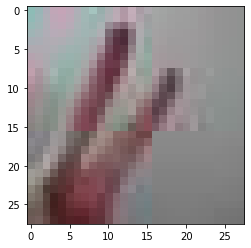

예측확률분포: [0.02381778 0.40421742 0.5719648 ]
라벨: 1, 예측결과: 2


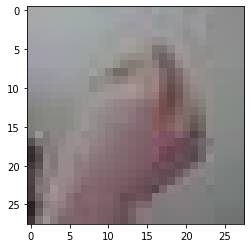

예측확률분포: [3.6331663e-01 1.0582104e-04 6.3657761e-01]
라벨: 0, 예측결과: 2


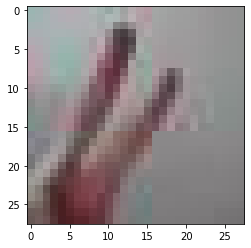

In [154]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 6. 인식률을 높이기 위한 시도

#### 1. 이미지의 특징 고려 : channel 1, 2값 4배로 수정

In [155]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=128
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                102432    
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

#### 2. 알고리즘 복잡도 수정 : dense 값 4배로 수정

In [156]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

#### 3. 학습 반복 횟수 수정 : train_epoch값 4배로 수정

In [157]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_57 (Dense)             (None, 10)              

- _하이퍼파라미터 수치를 각각 4배씩 올려서 확인한 결과 dense > epoch > channel 순으로 높은 인식률을 보였지만 결과적으로 기존 모델보다 낮은 인식률을 보임_
- _하이퍼파라미터 수치를 각각 더 큰 배수로 올리거나, 각각 내리거나 또는 한꺼번에 변경해도 보았으나 기존 학습보다 낮은 인식률을 보임_
- _따라서 처음 진행했더 하이퍼파라미터 수치가 적당한 것으로 보임(이 부분에 대해서는 어떻게 수치를 적용해야 하는지 정확히 모르겠음)_
- _잘못 추론된 데이터를 직접 확인해 보니 데이터 전처리의 중요성을 알 수 있었음_
- _첫번째 Exploration을 진행하면서 어려운 부분도 많았지만 직접 실행해보면서 몰입감과 성취감을 느낄 수 있었음_